In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from pandas import read_hdf
from pandas import set_option
from pandas import DataFrame

from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import VarianceThreshold

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from tqdm import tqdm

c:\program files\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Load training data HDF5 using Pandas
train = read_hdf("train.h5", "train")

# Load training data into arrays Y and X
data = train.values
y, X = data[:, 0], data[:, 1:]
 
# Load test (challenge) data HDF5 using Pandas
test = read_hdf("test.h5", "test")

# Load test (challenge) data into array test_X
X_challenge = test.values

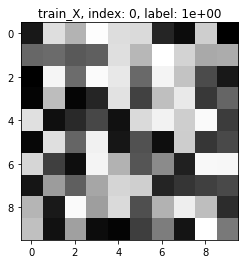

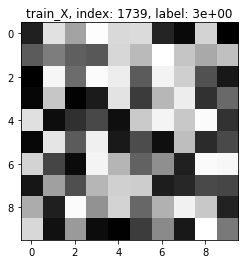

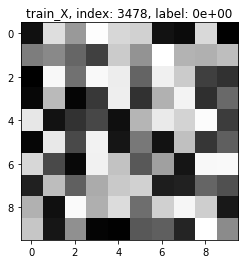

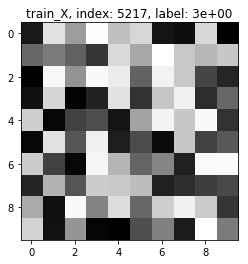

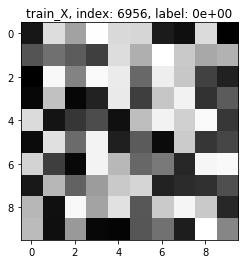

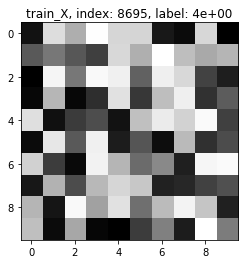

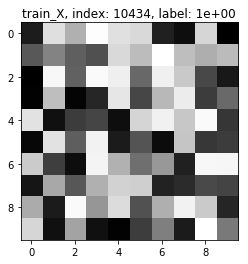

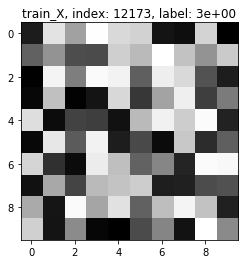

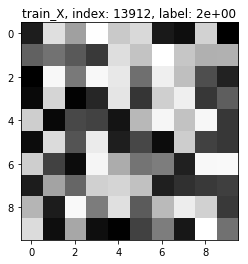

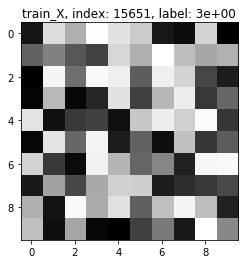

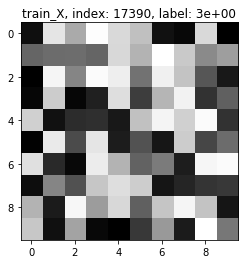

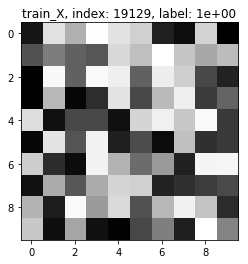

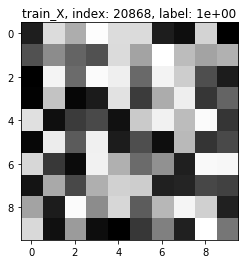

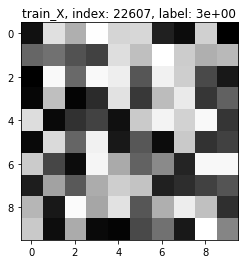

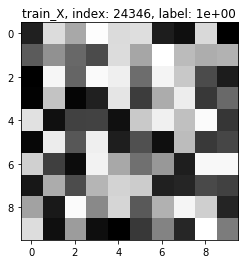

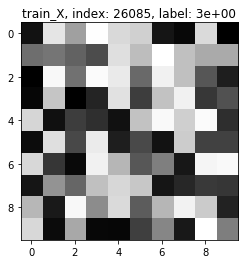

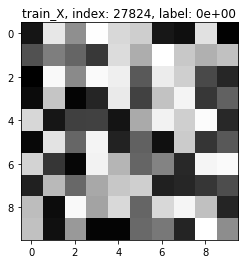

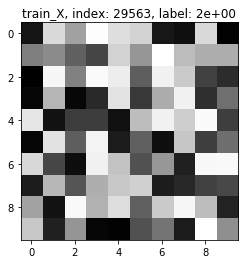

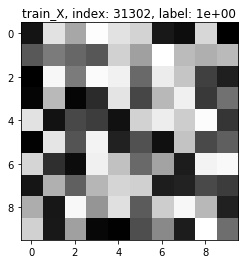

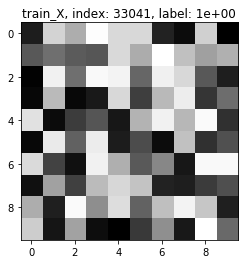

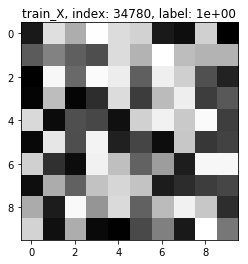

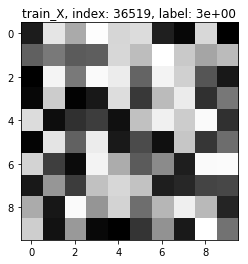

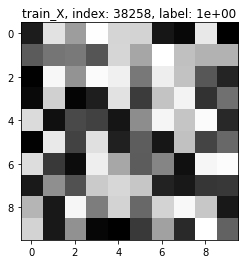

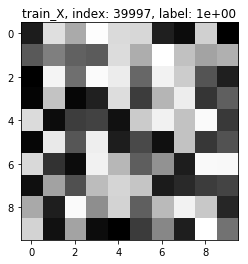

In [3]:
# Visualizing the data

# Function for displaying a training sample by its index
def show_sample(index, a=10, b=10):
    assert a * b == X.shape[1], 'a * b must equal number of features'
    label = y[index]
    # Reshape train_X array sample into a x b rectangle image
    image = X[index].reshape([a, b])
    plt.title('train_X, index: {}, label: {:.1}'.format(index, label))
    plt.imshow(image, cmap='gray_r')
    plt.show()
    
# Display a selection of images
for i in range(0,40000,1739):
    show_sample(i)

In [4]:
# Split given data into train and test set
validation_size = 0.1
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [5]:
# Make pipeline: mandatory transformations plus other experiments
pipeline = Pipeline(memory=None,
                    steps=[('std_scaler', StandardScaler())])#,
#                            ('poly_features', PolynomialFeatures()),
#                            ('anova', SelectKBest(f_regression, k=64)), #best: 64 for RandomForest, 200 for Keras
#                            ])

In [6]:
pipeline.fit(X_train, y_train)
X_train_transformed = pipeline.transform(X_train)
X_test_transformed = pipeline.transform(X_test)
X_challenge_transformed = pipeline.transform(X_challenge)

## DeepSuperLearner

In [7]:
from sklearn.ensemble.forest import ExtraTreesClassifier as ExtremeRandomizedTrees
from sklearn.neighbors import KNeighborsClassifier as kNearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble.forest import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from deepSuperLearner import *

In [8]:
ERT_learner = ExtremeRandomizedTrees(n_estimators=200, max_depth=None, max_features=1, n_jobs=-1)
kNN_learner = kNearestNeighbors(n_neighbors=11, n_jobs=-1)
LR_learner = LogisticRegression(n_jobs=-1)
RFC_learner = RandomForestClassifier(n_estimators=200, max_depth=None, n_jobs=-1)
XGB_learner = XGBClassifier(n_estimators=200, max_depth=3, learning_rate=1., n_jobs=-1)
Base_learners = {'ExtremeRandomizedTrees':ERT_learner, 'kNearestNeighbors':kNN_learner, 'LogisticRegression':LR_learner,
                 'RandomForestClassifier':RFC_learner, 'XGBClassifier':XGB_learner}

np.random.seed(100)

c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 doe

Iteration: 0 Loss: 0.29761201983935437
Weights:  [0.         0.39535004 0.00406612 0.01863334 0.5819505 ]


c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 doe

Iteration: 1 Loss: 0.2883087121508834
Weights:  [0.         0.27353133 0.35345554 0.07127247 0.30174067]


c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 doe

Iteration: 2 Loss: 0.2868155895298413
Weights:  [0.         0.25849715 0.2769539  0.24706932 0.21747963]


c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 doe

Iteration: 3 Loss: 0.2860356749858368
Weights:  [0.         0.25445983 0.28661036 0.27628793 0.18264188]


c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 doe

Iteration: 4 Loss: 0.28607981489098916
Weights:  [0.         0.26000568 0.29337385 0.29503799 0.15158248]
accuracy: 90.977%


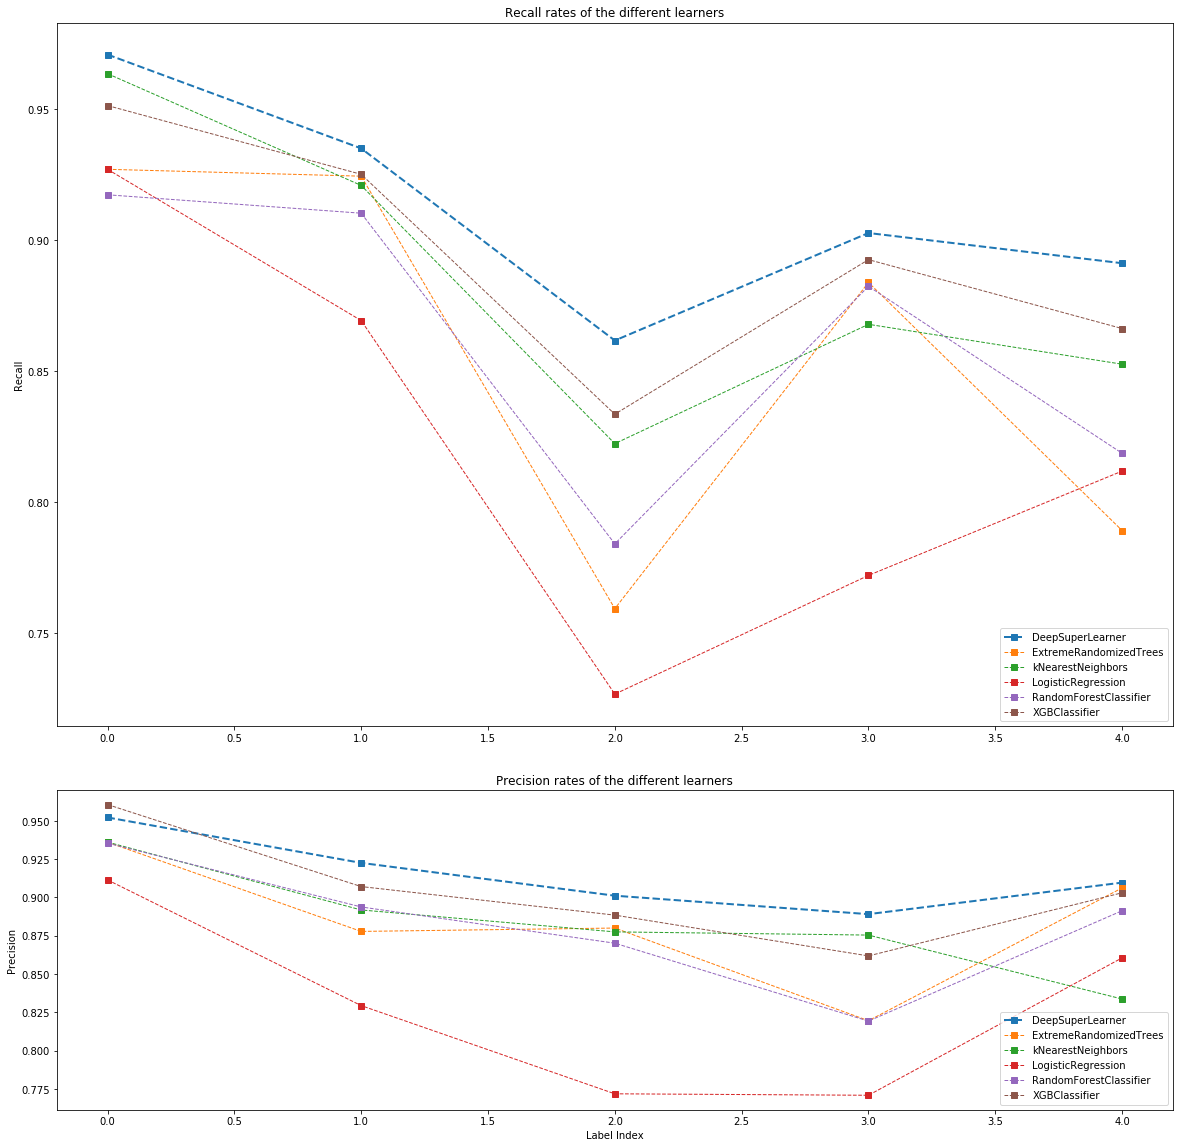

(array([0.97080292, 0.93498233, 0.86164229, 0.902687  , 0.89115646]),
 array([0.9522673 , 0.92259414, 0.90117647, 0.88912732, 0.90972222]),
 [array([0.9270073 , 0.92438163, 0.75928009, 0.88380537, 0.78911565]),
  array([0.96350365, 0.92084806, 0.82227222, 0.86782861, 0.85260771]),
  array([0.9270073 , 0.86925795, 0.72665917, 0.77196805, 0.81179138]),
  array([0.91727494, 0.91024735, 0.784027  , 0.88235294, 0.8185941 ]),
  array([0.9513382 , 0.92508834, 0.83352081, 0.89251997, 0.86621315])],
 [array([0.93611794, 0.87785235, 0.88005215, 0.81952862, 0.90625   ]),
  array([0.93617021, 0.89185489, 0.87755102, 0.87545788, 0.83370288]),
  array([0.91148325, 0.82939987, 0.77180406, 0.77084844, 0.86057692]),
  array([0.93548387, 0.89382373, 0.8701623 , 0.81928523, 0.89135802]),
  array([0.96068796, 0.90713791, 0.88848921, 0.86185133, 0.90307329])])

In [11]:
DSL_learner = DeepSuperLearner(Base_learners, K=5)
DSL_learner.fit(X_train_transformed, y_train, max_iterations=10, sample_weight=None)
y_pred = DSL_learner.predict(X_test_transformed)
predictions = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, predictions)
print("accuracy: {:.3f}%".format(accuracy*100))
DSL_learner.get_precision_recall(X_test_transformed, y_test, show_graphs=True)    

In [26]:
# Generate prediction
y_predict = DSL_learner.predict(X_challenge_transformed)

# Write prediction to output file
filename = 'prediction_DSL.csv'
result = DataFrame(np.argmax(y_predict, axis=1))
result.index = result.index + len(data)
result.to_csv(filename, index_label='Id', header=['y'])

## Keras MLP

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.optimizers import Adam

y_train_categorical = keras.utils.to_categorical(y_train, num_classes=5)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes=5)

model = Sequential()

model.add(Dense(400, input_dim=100, kernel_initializer='glorot_normal', bias_initializer='zeros'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(200, kernel_initializer='glorot_normal', bias_initializer='zeros'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(100, kernel_initializer='glorot_normal', bias_initializer='zeros'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(50, kernel_initializer='glorot_normal', bias_initializer='zeros'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(5, kernel_initializer='glorot_normal', bias_initializer='zeros'))
model.add(BatchNormalization())
model.add(Activation('softmax'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
adam = Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
#               optimizer=adam,
              metrics=['accuracy'])

early_stopping = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=1, mode='auto')]

model.fit(X_train_transformed, y_train_categorical,
          epochs=100,
          callbacks=early_stopping,
          validation_data=(X_test_transformed, y_test_categorical),
          batch_size=64)
score = model.evaluate(X_test_transformed, y_test_categorical, batch_size=64)
print('Final score: ', score)

Train on 40791 samples, validate on 4533 samples
Epoch 1/100
40791/40791 [==============================] - ETA: 12:29 - loss: 2.0809 - acc: 0.15 - ETA: 2:09 - loss: 1.7065 - acc: 0.2708 - ETA: 1:06 - loss: 1.5546 - acc: 0.328 - ETA: 46s - loss: 1.4765 - acc: 0.362 - ETA: 35s - loss: 1.4241 - acc: 0.39 - ETA: 29s - loss: 1.3941 - acc: 0.40 - ETA: 25s - loss: 1.3689 - acc: 0.42 - ETA: 22s - loss: 1.3469 - acc: 0.43 - ETA: 19s - loss: 1.3152 - acc: 0.45 - ETA: 18s - loss: 1.2832 - acc: 0.47 - ETA: 16s - loss: 1.2607 - acc: 0.48 - ETA: 15s - loss: 1.2370 - acc: 0.49 - ETA: 14s - loss: 1.2162 - acc: 0.50 - ETA: 13s - loss: 1.1990 - acc: 0.51 - ETA: 12s - loss: 1.1812 - acc: 0.52 - ETA: 12s - loss: 1.1635 - acc: 0.53 - ETA: 11s - loss: 1.1483 - acc: 0.54 - ETA: 11s - loss: 1.1376 - acc: 0.54 - ETA: 10s - loss: 1.1263 - acc: 0.55 - ETA: 10s - loss: 1.1151 - acc: 0.55 - ETA: 9s - loss: 1.1087 - acc: 0.5634 - ETA: 9s - loss: 1.1060 - acc: 0.565 - ETA: 9s - loss: 1.0960 - acc: 0.570 - ETA: 8s -

40791/40791 [==============================] - ETA: 7s - loss: 0.5675 - acc: 0.828 - ETA: 5s - loss: 0.5985 - acc: 0.812 - ETA: 5s - loss: 0.6359 - acc: 0.793 - ETA: 5s - loss: 0.6538 - acc: 0.782 - ETA: 5s - loss: 0.6620 - acc: 0.776 - ETA: 5s - loss: 0.6499 - acc: 0.778 - ETA: 5s - loss: 0.6521 - acc: 0.777 - ETA: 5s - loss: 0.6490 - acc: 0.782 - ETA: 5s - loss: 0.6440 - acc: 0.782 - ETA: 5s - loss: 0.6364 - acc: 0.784 - ETA: 5s - loss: 0.6310 - acc: 0.784 - ETA: 5s - loss: 0.6247 - acc: 0.786 - ETA: 5s - loss: 0.6301 - acc: 0.783 - ETA: 5s - loss: 0.6242 - acc: 0.785 - ETA: 5s - loss: 0.6241 - acc: 0.786 - ETA: 5s - loss: 0.6228 - acc: 0.786 - ETA: 4s - loss: 0.6219 - acc: 0.786 - ETA: 4s - loss: 0.6216 - acc: 0.787 - ETA: 4s - loss: 0.6252 - acc: 0.785 - ETA: 4s - loss: 0.6259 - acc: 0.785 - ETA: 4s - loss: 0.6241 - acc: 0.785 - ETA: 4s - loss: 0.6227 - acc: 0.784 - ETA: 4s - loss: 0.6221 - acc: 0.784 - ETA: 4s - loss: 0.6228 - acc: 0.783 - ETA: 4s - loss: 0.6237 - acc: 0.783 - ETA

40791/40791 [==============================] - ETA: 7s - loss: 0.5525 - acc: 0.812 - ETA: 6s - loss: 0.5851 - acc: 0.817 - ETA: 6s - loss: 0.5782 - acc: 0.808 - ETA: 6s - loss: 0.5582 - acc: 0.812 - ETA: 5s - loss: 0.5506 - acc: 0.812 - ETA: 5s - loss: 0.5660 - acc: 0.806 - ETA: 5s - loss: 0.5664 - acc: 0.805 - ETA: 5s - loss: 0.5646 - acc: 0.805 - ETA: 5s - loss: 0.5609 - acc: 0.807 - ETA: 5s - loss: 0.5615 - acc: 0.809 - ETA: 5s - loss: 0.5517 - acc: 0.813 - ETA: 5s - loss: 0.5540 - acc: 0.811 - ETA: 5s - loss: 0.5625 - acc: 0.809 - ETA: 5s - loss: 0.5635 - acc: 0.809 - ETA: 5s - loss: 0.5680 - acc: 0.809 - ETA: 5s - loss: 0.5664 - acc: 0.809 - ETA: 5s - loss: 0.5632 - acc: 0.810 - ETA: 5s - loss: 0.5623 - acc: 0.810 - ETA: 5s - loss: 0.5551 - acc: 0.813 - ETA: 5s - loss: 0.5516 - acc: 0.814 - ETA: 5s - loss: 0.5512 - acc: 0.815 - ETA: 4s - loss: 0.5516 - acc: 0.813 - ETA: 4s - loss: 0.5475 - acc: 0.815 - ETA: 4s - loss: 0.5480 - acc: 0.814 - ETA: 4s - loss: 0.5468 - acc: 0.815 - ETA

40791/40791 [==============================] - ETA: 7s - loss: 0.3264 - acc: 0.937 - ETA: 6s - loss: 0.4924 - acc: 0.837 - ETA: 5s - loss: 0.5258 - acc: 0.824 - ETA: 5s - loss: 0.5460 - acc: 0.815 - ETA: 5s - loss: 0.5541 - acc: 0.812 - ETA: 5s - loss: 0.5470 - acc: 0.818 - ETA: 5s - loss: 0.5326 - acc: 0.821 - ETA: 5s - loss: 0.5287 - acc: 0.823 - ETA: 5s - loss: 0.5298 - acc: 0.824 - ETA: 5s - loss: 0.5200 - acc: 0.829 - ETA: 5s - loss: 0.5126 - acc: 0.831 - ETA: 5s - loss: 0.5126 - acc: 0.830 - ETA: 5s - loss: 0.5123 - acc: 0.829 - ETA: 5s - loss: 0.5131 - acc: 0.831 - ETA: 5s - loss: 0.5084 - acc: 0.832 - ETA: 5s - loss: 0.5047 - acc: 0.834 - ETA: 5s - loss: 0.5029 - acc: 0.834 - ETA: 5s - loss: 0.5115 - acc: 0.833 - ETA: 4s - loss: 0.5104 - acc: 0.833 - ETA: 4s - loss: 0.5098 - acc: 0.834 - ETA: 4s - loss: 0.5129 - acc: 0.833 - ETA: 4s - loss: 0.5130 - acc: 0.833 - ETA: 4s - loss: 0.5098 - acc: 0.833 - ETA: 4s - loss: 0.5113 - acc: 0.833 - ETA: 4s - loss: 0.5129 - acc: 0.833 - ETA

40791/40791 [==============================] - ETA: 7s - loss: 0.4186 - acc: 0.859 - ETA: 6s - loss: 0.4314 - acc: 0.857 - ETA: 6s - loss: 0.4650 - acc: 0.851 - ETA: 6s - loss: 0.4502 - acc: 0.851 - ETA: 5s - loss: 0.4502 - acc: 0.853 - ETA: 5s - loss: 0.4601 - acc: 0.846 - ETA: 5s - loss: 0.4723 - acc: 0.844 - ETA: 5s - loss: 0.4740 - acc: 0.840 - ETA: 5s - loss: 0.4739 - acc: 0.841 - ETA: 5s - loss: 0.4794 - acc: 0.838 - ETA: 5s - loss: 0.4733 - acc: 0.841 - ETA: 5s - loss: 0.4740 - acc: 0.841 - ETA: 5s - loss: 0.4721 - acc: 0.841 - ETA: 5s - loss: 0.4716 - acc: 0.841 - ETA: 5s - loss: 0.4737 - acc: 0.840 - ETA: 5s - loss: 0.4773 - acc: 0.841 - ETA: 5s - loss: 0.4774 - acc: 0.842 - ETA: 5s - loss: 0.4795 - acc: 0.842 - ETA: 5s - loss: 0.4781 - acc: 0.843 - ETA: 5s - loss: 0.4801 - acc: 0.842 - ETA: 5s - loss: 0.4775 - acc: 0.843 - ETA: 4s - loss: 0.4762 - acc: 0.844 - ETA: 4s - loss: 0.4736 - acc: 0.845 - ETA: 4s - loss: 0.4734 - acc: 0.846 - ETA: 4s - loss: 0.4752 - acc: 0.844 - ETA

40791/40791 [==============================] - ETA: 6s - loss: 0.4858 - acc: 0.812 - ETA: 5s - loss: 0.3697 - acc: 0.886 - ETA: 5s - loss: 0.4180 - acc: 0.869 - ETA: 5s - loss: 0.4153 - acc: 0.864 - ETA: 5s - loss: 0.4106 - acc: 0.866 - ETA: 5s - loss: 0.4138 - acc: 0.862 - ETA: 5s - loss: 0.4214 - acc: 0.860 - ETA: 5s - loss: 0.4250 - acc: 0.857 - ETA: 5s - loss: 0.4338 - acc: 0.855 - ETA: 5s - loss: 0.4420 - acc: 0.852 - ETA: 5s - loss: 0.4365 - acc: 0.854 - ETA: 5s - loss: 0.4394 - acc: 0.854 - ETA: 5s - loss: 0.4459 - acc: 0.853 - ETA: 5s - loss: 0.4457 - acc: 0.853 - ETA: 5s - loss: 0.4507 - acc: 0.852 - ETA: 5s - loss: 0.4492 - acc: 0.852 - ETA: 4s - loss: 0.4538 - acc: 0.850 - ETA: 4s - loss: 0.4525 - acc: 0.851 - ETA: 4s - loss: 0.4528 - acc: 0.850 - ETA: 4s - loss: 0.4575 - acc: 0.848 - ETA: 4s - loss: 0.4550 - acc: 0.849 - ETA: 4s - loss: 0.4544 - acc: 0.849 - ETA: 4s - loss: 0.4565 - acc: 0.848 - ETA: 4s - loss: 0.4534 - acc: 0.849 - ETA: 4s - loss: 0.4534 - acc: 0.849 - ETA

40791/40791 [==============================] - ETA: 7s - loss: 0.3952 - acc: 0.828 - ETA: 6s - loss: 0.4847 - acc: 0.830 - ETA: 6s - loss: 0.4656 - acc: 0.846 - ETA: 5s - loss: 0.4458 - acc: 0.850 - ETA: 5s - loss: 0.4614 - acc: 0.840 - ETA: 5s - loss: 0.4793 - acc: 0.839 - ETA: 5s - loss: 0.4868 - acc: 0.836 - ETA: 5s - loss: 0.4810 - acc: 0.838 - ETA: 5s - loss: 0.4725 - acc: 0.843 - ETA: 5s - loss: 0.4686 - acc: 0.842 - ETA: 5s - loss: 0.4695 - acc: 0.841 - ETA: 5s - loss: 0.4697 - acc: 0.842 - ETA: 5s - loss: 0.4650 - acc: 0.844 - ETA: 5s - loss: 0.4604 - acc: 0.845 - ETA: 5s - loss: 0.4572 - acc: 0.847 - ETA: 5s - loss: 0.4571 - acc: 0.847 - ETA: 5s - loss: 0.4538 - acc: 0.848 - ETA: 5s - loss: 0.4516 - acc: 0.849 - ETA: 5s - loss: 0.4489 - acc: 0.851 - ETA: 4s - loss: 0.4467 - acc: 0.852 - ETA: 4s - loss: 0.4458 - acc: 0.852 - ETA: 4s - loss: 0.4492 - acc: 0.852 - ETA: 4s - loss: 0.4517 - acc: 0.851 - ETA: 4s - loss: 0.4537 - acc: 0.850 - ETA: 4s - loss: 0.4523 - acc: 0.851 - ETA

40791/40791 [==============================] - ETA: 8s - loss: 0.4620 - acc: 0.796 - ETA: 6s - loss: 0.4156 - acc: 0.861 - ETA: 5s - loss: 0.3967 - acc: 0.859 - ETA: 5s - loss: 0.4165 - acc: 0.851 - ETA: 5s - loss: 0.4264 - acc: 0.852 - ETA: 5s - loss: 0.4178 - acc: 0.859 - ETA: 5s - loss: 0.4238 - acc: 0.856 - ETA: 5s - loss: 0.4347 - acc: 0.852 - ETA: 5s - loss: 0.4302 - acc: 0.853 - ETA: 5s - loss: 0.4339 - acc: 0.853 - ETA: 5s - loss: 0.4373 - acc: 0.853 - ETA: 5s - loss: 0.4368 - acc: 0.854 - ETA: 5s - loss: 0.4339 - acc: 0.855 - ETA: 5s - loss: 0.4326 - acc: 0.855 - ETA: 5s - loss: 0.4322 - acc: 0.855 - ETA: 5s - loss: 0.4363 - acc: 0.855 - ETA: 5s - loss: 0.4342 - acc: 0.856 - ETA: 5s - loss: 0.4372 - acc: 0.854 - ETA: 4s - loss: 0.4379 - acc: 0.854 - ETA: 4s - loss: 0.4370 - acc: 0.855 - ETA: 4s - loss: 0.4369 - acc: 0.855 - ETA: 4s - loss: 0.4383 - acc: 0.854 - ETA: 4s - loss: 0.4378 - acc: 0.854 - ETA: 4s - loss: 0.4360 - acc: 0.855 - ETA: 4s - loss: 0.4359 - acc: 0.855 - ETA

40791/40791 [==============================] - ETA: 7s - loss: 0.5638 - acc: 0.765 - ETA: 6s - loss: 0.3848 - acc: 0.877 - ETA: 5s - loss: 0.4183 - acc: 0.871 - ETA: 5s - loss: 0.4239 - acc: 0.868 - ETA: 5s - loss: 0.4362 - acc: 0.860 - ETA: 5s - loss: 0.4350 - acc: 0.859 - ETA: 5s - loss: 0.4334 - acc: 0.861 - ETA: 5s - loss: 0.4274 - acc: 0.863 - ETA: 5s - loss: 0.4256 - acc: 0.863 - ETA: 5s - loss: 0.4246 - acc: 0.861 - ETA: 5s - loss: 0.4212 - acc: 0.863 - ETA: 5s - loss: 0.4266 - acc: 0.862 - ETA: 5s - loss: 0.4319 - acc: 0.859 - ETA: 5s - loss: 0.4289 - acc: 0.860 - ETA: 5s - loss: 0.4247 - acc: 0.862 - ETA: 5s - loss: 0.4258 - acc: 0.861 - ETA: 5s - loss: 0.4250 - acc: 0.861 - ETA: 5s - loss: 0.4251 - acc: 0.861 - ETA: 4s - loss: 0.4241 - acc: 0.861 - ETA: 4s - loss: 0.4233 - acc: 0.861 - ETA: 4s - loss: 0.4221 - acc: 0.861 - ETA: 4s - loss: 0.4219 - acc: 0.862 - ETA: 4s - loss: 0.4216 - acc: 0.862 - ETA: 4s - loss: 0.4253 - acc: 0.861 - ETA: 4s - loss: 0.4283 - acc: 0.860 - ETA

40791/40791 [==============================] - ETA: 7s - loss: 0.3922 - acc: 0.843 - ETA: 6s - loss: 0.4120 - acc: 0.854 - ETA: 5s - loss: 0.4460 - acc: 0.841 - ETA: 6s - loss: 0.4329 - acc: 0.853 - ETA: 5s - loss: 0.4383 - acc: 0.853 - ETA: 5s - loss: 0.4275 - acc: 0.858 - ETA: 5s - loss: 0.4313 - acc: 0.856 - ETA: 5s - loss: 0.4209 - acc: 0.860 - ETA: 5s - loss: 0.4262 - acc: 0.859 - ETA: 5s - loss: 0.4251 - acc: 0.859 - ETA: 5s - loss: 0.4251 - acc: 0.860 - ETA: 5s - loss: 0.4213 - acc: 0.861 - ETA: 5s - loss: 0.4194 - acc: 0.862 - ETA: 5s - loss: 0.4180 - acc: 0.864 - ETA: 5s - loss: 0.4259 - acc: 0.861 - ETA: 5s - loss: 0.4269 - acc: 0.862 - ETA: 5s - loss: 0.4317 - acc: 0.860 - ETA: 5s - loss: 0.4342 - acc: 0.859 - ETA: 4s - loss: 0.4300 - acc: 0.861 - ETA: 4s - loss: 0.4293 - acc: 0.862 - ETA: 4s - loss: 0.4295 - acc: 0.861 - ETA: 4s - loss: 0.4259 - acc: 0.862 - ETA: 4s - loss: 0.4239 - acc: 0.862 - ETA: 4s - loss: 0.4242 - acc: 0.862 - ETA: 4s - loss: 0.4241 - acc: 0.863 - ETA

40791/40791 [==============================] - ETA: 7s - loss: 0.3882 - acc: 0.843 - ETA: 6s - loss: 0.4521 - acc: 0.857 - ETA: 5s - loss: 0.4221 - acc: 0.867 - ETA: 5s - loss: 0.4279 - acc: 0.864 - ETA: 6s - loss: 0.4276 - acc: 0.860 - ETA: 6s - loss: 0.4356 - acc: 0.856 - ETA: 5s - loss: 0.4352 - acc: 0.861 - ETA: 5s - loss: 0.4313 - acc: 0.859 - ETA: 5s - loss: 0.4231 - acc: 0.861 - ETA: 5s - loss: 0.4166 - acc: 0.863 - ETA: 5s - loss: 0.4048 - acc: 0.867 - ETA: 5s - loss: 0.3991 - acc: 0.868 - ETA: 5s - loss: 0.3989 - acc: 0.869 - ETA: 5s - loss: 0.3952 - acc: 0.870 - ETA: 5s - loss: 0.3979 - acc: 0.870 - ETA: 5s - loss: 0.3929 - acc: 0.871 - ETA: 5s - loss: 0.3949 - acc: 0.869 - ETA: 5s - loss: 0.3956 - acc: 0.870 - ETA: 5s - loss: 0.3962 - acc: 0.869 - ETA: 4s - loss: 0.3977 - acc: 0.869 - ETA: 4s - loss: 0.4016 - acc: 0.867 - ETA: 4s - loss: 0.3980 - acc: 0.869 - ETA: 4s - loss: 0.3973 - acc: 0.868 - ETA: 4s - loss: 0.3951 - acc: 0.870 - ETA: 4s - loss: 0.3966 - acc: 0.869 - ETA

40791/40791 [==============================] - ETA: 6s - loss: 0.4115 - acc: 0.875 - ETA: 6s - loss: 0.3891 - acc: 0.877 - ETA: 5s - loss: 0.3849 - acc: 0.878 - ETA: 5s - loss: 0.4010 - acc: 0.877 - ETA: 5s - loss: 0.4044 - acc: 0.880 - ETA: 5s - loss: 0.4080 - acc: 0.882 - ETA: 5s - loss: 0.4085 - acc: 0.878 - ETA: 5s - loss: 0.3964 - acc: 0.883 - ETA: 5s - loss: 0.3889 - acc: 0.884 - ETA: 5s - loss: 0.3931 - acc: 0.882 - ETA: 5s - loss: 0.3929 - acc: 0.881 - ETA: 5s - loss: 0.3925 - acc: 0.879 - ETA: 5s - loss: 0.3948 - acc: 0.877 - ETA: 5s - loss: 0.3982 - acc: 0.876 - ETA: 5s - loss: 0.3999 - acc: 0.875 - ETA: 5s - loss: 0.3983 - acc: 0.875 - ETA: 5s - loss: 0.4032 - acc: 0.873 - ETA: 5s - loss: 0.4058 - acc: 0.872 - ETA: 5s - loss: 0.4054 - acc: 0.871 - ETA: 4s - loss: 0.4063 - acc: 0.871 - ETA: 4s - loss: 0.4067 - acc: 0.870 - ETA: 4s - loss: 0.4051 - acc: 0.871 - ETA: 4s - loss: 0.4056 - acc: 0.870 - ETA: 4s - loss: 0.4054 - acc: 0.869 - ETA: 4s - loss: 0.4037 - acc: 0.870 - ETA

40791/40791 [==============================] - ETA: 8s - loss: 0.5235 - acc: 0.843 - ETA: 6s - loss: 0.4078 - acc: 0.875 - ETA: 6s - loss: 0.4026 - acc: 0.876 - ETA: 5s - loss: 0.4162 - acc: 0.866 - ETA: 5s - loss: 0.4003 - acc: 0.869 - ETA: 5s - loss: 0.3922 - acc: 0.867 - ETA: 5s - loss: 0.4046 - acc: 0.866 - ETA: 5s - loss: 0.4097 - acc: 0.866 - ETA: 5s - loss: 0.4070 - acc: 0.868 - ETA: 5s - loss: 0.4031 - acc: 0.868 - ETA: 5s - loss: 0.4014 - acc: 0.868 - ETA: 5s - loss: 0.4029 - acc: 0.868 - ETA: 5s - loss: 0.3996 - acc: 0.870 - ETA: 5s - loss: 0.4046 - acc: 0.869 - ETA: 5s - loss: 0.4028 - acc: 0.870 - ETA: 5s - loss: 0.3972 - acc: 0.872 - ETA: 5s - loss: 0.4016 - acc: 0.871 - ETA: 5s - loss: 0.4035 - acc: 0.870 - ETA: 5s - loss: 0.4042 - acc: 0.868 - ETA: 4s - loss: 0.4003 - acc: 0.870 - ETA: 4s - loss: 0.3988 - acc: 0.871 - ETA: 4s - loss: 0.3976 - acc: 0.871 - ETA: 4s - loss: 0.4005 - acc: 0.870 - ETA: 4s - loss: 0.4006 - acc: 0.870 - ETA: 4s - loss: 0.4021 - acc: 0.870 - ETA

40791/40791 [==============================] - ETA: 7s - loss: 0.2656 - acc: 0.937 - ETA: 6s - loss: 0.3785 - acc: 0.890 - ETA: 6s - loss: 0.3828 - acc: 0.886 - ETA: 6s - loss: 0.4085 - acc: 0.877 - ETA: 5s - loss: 0.4074 - acc: 0.875 - ETA: 5s - loss: 0.4043 - acc: 0.874 - ETA: 5s - loss: 0.3945 - acc: 0.878 - ETA: 5s - loss: 0.3980 - acc: 0.875 - ETA: 5s - loss: 0.3982 - acc: 0.875 - ETA: 5s - loss: 0.4017 - acc: 0.872 - ETA: 5s - loss: 0.4072 - acc: 0.872 - ETA: 5s - loss: 0.4078 - acc: 0.869 - ETA: 5s - loss: 0.4090 - acc: 0.867 - ETA: 5s - loss: 0.4095 - acc: 0.865 - ETA: 5s - loss: 0.4079 - acc: 0.866 - ETA: 5s - loss: 0.4014 - acc: 0.867 - ETA: 5s - loss: 0.4028 - acc: 0.869 - ETA: 5s - loss: 0.3989 - acc: 0.870 - ETA: 5s - loss: 0.3975 - acc: 0.870 - ETA: 4s - loss: 0.3971 - acc: 0.871 - ETA: 4s - loss: 0.3971 - acc: 0.870 - ETA: 4s - loss: 0.3972 - acc: 0.870 - ETA: 4s - loss: 0.3966 - acc: 0.871 - ETA: 4s - loss: 0.3992 - acc: 0.870 - ETA: 4s - loss: 0.3960 - acc: 0.872 - ETA

40791/40791 [==============================] - ETA: 8s - loss: 0.3726 - acc: 0.921 - ETA: 6s - loss: 0.4105 - acc: 0.893 - ETA: 6s - loss: 0.4002 - acc: 0.877 - ETA: 6s - loss: 0.4006 - acc: 0.872 - ETA: 6s - loss: 0.4155 - acc: 0.868 - ETA: 6s - loss: 0.4170 - acc: 0.865 - ETA: 5s - loss: 0.4075 - acc: 0.866 - ETA: 5s - loss: 0.4122 - acc: 0.862 - ETA: 5s - loss: 0.4153 - acc: 0.860 - ETA: 5s - loss: 0.4061 - acc: 0.864 - ETA: 5s - loss: 0.4041 - acc: 0.864 - ETA: 5s - loss: 0.4006 - acc: 0.865 - ETA: 5s - loss: 0.4011 - acc: 0.864 - ETA: 5s - loss: 0.3977 - acc: 0.865 - ETA: 5s - loss: 0.3961 - acc: 0.865 - ETA: 5s - loss: 0.3907 - acc: 0.865 - ETA: 5s - loss: 0.3905 - acc: 0.865 - ETA: 5s - loss: 0.3876 - acc: 0.866 - ETA: 5s - loss: 0.3875 - acc: 0.868 - ETA: 5s - loss: 0.3925 - acc: 0.866 - ETA: 5s - loss: 0.3935 - acc: 0.866 - ETA: 4s - loss: 0.3917 - acc: 0.867 - ETA: 4s - loss: 0.3898 - acc: 0.867 - ETA: 4s - loss: 0.3896 - acc: 0.867 - ETA: 4s - loss: 0.3903 - acc: 0.867 - ETA

40791/40791 [==============================] - ETA: 6s - loss: 0.1766 - acc: 0.953 - ETA: 5s - loss: 0.2907 - acc: 0.910 - ETA: 5s - loss: 0.3184 - acc: 0.906 - ETA: 5s - loss: 0.3155 - acc: 0.906 - ETA: 5s - loss: 0.3181 - acc: 0.903 - ETA: 5s - loss: 0.3259 - acc: 0.898 - ETA: 5s - loss: 0.3331 - acc: 0.892 - ETA: 5s - loss: 0.3409 - acc: 0.891 - ETA: 5s - loss: 0.3468 - acc: 0.891 - ETA: 5s - loss: 0.3458 - acc: 0.893 - ETA: 5s - loss: 0.3483 - acc: 0.891 - ETA: 5s - loss: 0.3475 - acc: 0.892 - ETA: 5s - loss: 0.3468 - acc: 0.891 - ETA: 5s - loss: 0.3438 - acc: 0.892 - ETA: 5s - loss: 0.3493 - acc: 0.890 - ETA: 5s - loss: 0.3509 - acc: 0.889 - ETA: 5s - loss: 0.3518 - acc: 0.889 - ETA: 5s - loss: 0.3527 - acc: 0.889 - ETA: 5s - loss: 0.3563 - acc: 0.887 - ETA: 4s - loss: 0.3595 - acc: 0.885 - ETA: 4s - loss: 0.3598 - acc: 0.884 - ETA: 4s - loss: 0.3582 - acc: 0.885 - ETA: 4s - loss: 0.3580 - acc: 0.885 - ETA: 4s - loss: 0.3583 - acc: 0.885 - ETA: 4s - loss: 0.3565 - acc: 0.885 - ETA

40791/40791 [==============================] - ETA: 8s - loss: 0.5377 - acc: 0.843 - ETA: 6s - loss: 0.4249 - acc: 0.875 - ETA: 6s - loss: 0.4120 - acc: 0.867 - ETA: 6s - loss: 0.4002 - acc: 0.865 - ETA: 6s - loss: 0.4001 - acc: 0.870 - ETA: 5s - loss: 0.3903 - acc: 0.869 - ETA: 5s - loss: 0.3953 - acc: 0.866 - ETA: 5s - loss: 0.3920 - acc: 0.871 - ETA: 5s - loss: 0.3821 - acc: 0.875 - ETA: 5s - loss: 0.3807 - acc: 0.872 - ETA: 5s - loss: 0.3710 - acc: 0.876 - ETA: 5s - loss: 0.3715 - acc: 0.876 - ETA: 5s - loss: 0.3755 - acc: 0.876 - ETA: 5s - loss: 0.3789 - acc: 0.874 - ETA: 5s - loss: 0.3762 - acc: 0.877 - ETA: 5s - loss: 0.3760 - acc: 0.877 - ETA: 5s - loss: 0.3744 - acc: 0.877 - ETA: 5s - loss: 0.3726 - acc: 0.878 - ETA: 5s - loss: 0.3738 - acc: 0.877 - ETA: 5s - loss: 0.3726 - acc: 0.878 - ETA: 4s - loss: 0.3727 - acc: 0.878 - ETA: 4s - loss: 0.3705 - acc: 0.879 - ETA: 4s - loss: 0.3667 - acc: 0.880 - ETA: 4s - loss: 0.3675 - acc: 0.880 - ETA: 4s - loss: 0.3657 - acc: 0.881 - ETA

In [10]:
# Generate prediction
y_predict = model.predict(X_challenge_transformed)

# Write prediction to output file
filename = 'prediction_MLP.csv'
result = DataFrame(np.argmax(y_predict, axis=1))
result.index = result.index + len(data)
result.to_csv(filename, index_label='Id', header=['y'])

In [13]:
# Generate ensemble prediction
y_predict = (model.predict(X_challenge_transformed) + DSL_learner.predict(X_challenge_transformed)) / 2

# Write prediction to output file
filename = 'prediction_ens.csv'
result = DataFrame(np.argmax(y_predict, axis=1))
result.index = result.index + len(data)
result.to_csv(filename, index_label='Id', header=['y'])